In [1]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
from bs4 import BeautifulSoup
import time
import requests     # to get images
import shutil       # to save files locally
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from random import randint
import  random
import os
os.chdir('C:/Users/Travis/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction_V2')

from cmath import nan

In [2]:
# Load fights df
fights_df = pd.read_csv('data/final/aggregates/Fight_DF.csv')
print(fights_df.shape)
fights_df.head()

(8309, 79)


,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_Clinch_Strikes_land,B_Clinch_Strikes_att,A_Clinch_Strikes_percent,B_Clinch_Strikes_percent,A_Ground_Strikes_land,A_Ground_Strikes_att,B_Ground_Strikes_land,B_Ground_Strikes_att,A_Ground_Strikes_percent,B_Ground_Strikes_percent
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,4,4,1.000000,1.000000,13,28,0,0,0.464286,0.000000
1,Joshua Burkman,Josh Neer,1,0,35,88,19,39,0.39,0.48,...,5,9,0.571429,0.555556,5,10,7,9,0.500000,0.777778
2,Paddy Pimblett,Kazula Vargas,0,0,3,6,7,9,0.50,0.77,...,2,2,0.000000,1.000000,1,1,3,3,1.000000,1.000000
3,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,0,1,1.000000,0.000000,0,0,0,0,0.000000,0.000000
4,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,3,8,0.750000,0.375000,10,17,0,0,0.588235,0.000000


### Add Fighter Odds

Makes sense to do it before doubling the dataframe

In [ ]:
# Load Fighter Odds
odds_by_fighter = pd.read_csv('data/final/odds/All_Odds_by_Fighter_WithChange.csv')

print(odds_by_fighter.shape)
odds_by_fighter.head()

In [ ]:
odds_by_fighter['event_code'] = odds_by_fighter['event_ufcstats_url'].str.split('/').str[-1] 

In [ ]:
odds_by_fighter['fighter'] = odds_by_fighter['fighter'].str.strip()

In [ ]:
odds_by_fighter.head(3)

In [ ]:
event_data = pd.read_csv('data/final/events/All_Events_Fights_and_FightUrls.csv')

In [ ]:
event_data['Fighter1'] = event_data['Fighter1'].str.strip()
event_data['Fighter2'] = event_data['Fighter2'].str.strip()

In [ ]:
event_data.head(3)

In [ ]:
# Make sure the formatting is the same

event_data['event_id'] = event_data['event_id'].astype(str)
odds_by_fighter['event_code'] = odds_by_fighter['event_code'].astype(str)

In [ ]:
# pick random row from odds_by_fighter
rand_row = odds_by_fighter.sample(1)
rand_row

In [ ]:
test_data = event_data[event_data['event_id'] == rand_row['event_code'].values[0]]
test_data

In [ ]:
# add fight urls to odds by fighter
def grab_fight_url(fighter, event_code):
        try:
                data = event_data[event_data['event_id'] == event_code]
                data1 = data[data['Fighter1'] == fighter]
                data2 = data[data['Fighter2'] == fighter]
                data3 = pd.concat([data1, data2])

                return data3['fight_link'].values[0]
        except:
                return np.nan

In [ ]:
# test
grab_fight_url('Robert Whittaker', '00a905a4a4a2b071')

In [ ]:
# add fight urls to odds by fighter
odds_by_fighter['fight_url'] = odds_by_fighter.apply(lambda row: grab_fight_url(row['fighter'], row['event_code']), axis=1)

In [ ]:
odds_by_fighter

In [ ]:
# add columns 'odds' to odds by fighter, where odds is equal to the 5D column unless it is nan, then it is equal to the Ref column
odds_by_fighter['odds'] = odds_by_fighter.apply(lambda row: row['5D'] if np.isnan(row['5D']) == False else row['Ref'], axis=1)

In [ ]:
odds_by_fighter

In [ ]:
# save odds by fighter with fight urls
odds_by_fighter.to_csv('data/final/odds/All_Odds_by_Fighter_With_Fight_Urls.csv', index=False)

### Double the Fights_DF

In [ ]:
# Create the double fights df (switching A and B)
fights_df2 = fights_df.copy()

# switch all _A and A_ to _C and C_
fights_df2.columns = fights_df2.columns.str.replace('Fighter_A', 'Fighter_C')
fights_df2.columns = fights_df2.columns.str.replace('A_', 'C_')

# switch all _B and B_ to _A and A_
fights_df2.columns = fights_df2.columns.str.replace('Fighter_B', 'Fighter_A')
fights_df2.columns = fights_df2.columns.str.replace('B_', 'A_')

# switch all _C and C_ to _B and B_
fights_df2.columns = fights_df2.columns.str.replace('Fighter_C', 'Fighter_B')
fights_df2.columns = fights_df2.columns.str.replace('C_', 'B_')

fights_df2.head()

In [ ]:
# add the new columns to the original df
double_fights_df = pd.concat([fights_df, fights_df2], axis=0)
double_fights_df


In [ ]:
double_fights_df.columns

In [ ]:
double_fights_df.to_csv('data/final/aggregates/Fight_DF_V2.csv', index=False)

In [ ]:
double_fights_df['event_url'].unique()

In [ ]:
double_fights_df.head()

## Add Odds by Fighter to FightsDf

### Load Point for OddsByFighter

In [ ]:
# load
odds_by_fighter = pd.read_csv('data/final/odds/All_Odds_by_Fighter_With_Fight_Urls.csv')

#### Note: We want to use ufcstats Urls as our connector

We could also just use the event code if that isnt working for some reason

In [ ]:
odds_by_fighter.head(2)

In [ ]:
# make sure formatting is the same (string)
odds_by_fighter['event_ufcstats_url'] = odds_by_fighter['event_ufcstats_url'].astype(str)
odds_by_fighter['event_code'] = odds_by_fighter['event_code'].astype(str)

double_fights_df['event_url'] = double_fights_df['event_url'].astype(str)


In [ ]:
# make sure name formatting is same
odds_by_fighter['fighter'] = odds_by_fighter['fighter'].str.strip()
double_fights_df['Fighter_A'] = double_fights_df['Fighter_A'].str.strip()
double_fights_df['Fighter_B'] = double_fights_df['Fighter_B'].str.strip()

In [ ]:
# Add column "Event Code", which is event code for ufcstats

double_fights_df['event_code'] = double_fights_df['event_url'].str.split('/').str[-1]

In [ ]:
double_fights_df['event_code'] = double_fights_df['event_code'].astype(str)

In [ ]:
# check the differences between double_fights_df['event_code'] and odds_by_fighter['event_code']
dfights = double_fights_df['event_code'].unique()
odds = odds_by_fighter['event_code'].unique()

# check differences in list
diff = [x for x in dfights if x not in odds]
diff

In [ ]:
diff2 = [x for x in odds if x not in dfights]
diff2

### Note: The double fights DF has lots of OUTSIDE of UFC fights, whereas the odds does not. As we want to focus on the UFC events, this is okay. 

In [ ]:
# Check Dtypes of odds_by_fighter
odds_by_fighter.dtypes

In [ ]:
odds_by_fighter['event_code'] = odds_by_fighter['event_code'].astype(str)
odds_by_fighter['event_ufcstats_url'] = odds_by_fighter['event_ufcstats_url'].astype(str)

In [ ]:
# Function that returns the odds for a fighter in a fight
# event_code is the event code for ufcstats

def get_odds_from_obf(event_code, fighter):
        try:
                data = odds_by_fighter[odds_by_fighter['event_code'] == event_code]
                data = data[data['fighter'] == fighter]
                return data['odds'].values[0]
        except:
                return np.nan

In [ ]:
# test
get_odds_from_obf('805ad1801eb26abb', 'Holly Holm')

In [ ]:
double_fights_df['Fighter_A_Odds'] = double_fights_df.apply(lambda row: get_odds_from_obf(row['event_code'], row['Fighter_A']), axis=1)
double_fights_df['Fighter_B_Odds'] = double_fights_df.apply(lambda row: get_odds_from_obf(row['event_code'], row['Fighter_B']), axis=1)

In [ ]:
# check missing
double_fights_df[double_fights_df['Fighter_A_Odds'].isna()]

In [ ]:
# check not missing
double_fights_df[double_fights_df['Fighter_A_Odds'].notna()]

## Add Odds Change to FightsDf

In [ ]:
def get_odds_change_from_obf(event_code, fighter):
        try:
                data = odds_by_fighter[odds_by_fighter['event_code'] == event_code]
                data = data[data['fighter'] == fighter]
                return data['odds_change'].values[0]
        except:
                return np.nan

In [ ]:
# add odds change
double_fights_df['Fighter_A_Odds_Change'] = double_fights_df.apply(lambda row: get_odds_change_from_obf(row['event_code'], row['Fighter_A']), axis=1)
double_fights_df['Fighter_B_Odds_Change'] = double_fights_df.apply(lambda row: get_odds_change_from_obf(row['event_code'], row['Fighter_B']), axis=1)


In [ ]:
double_fights_df

In [ ]:
f, ax = plt.subplots(figsize = (12,20))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = double_fights_df.isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

### As we know from earlier, we do not have many of these odds because these events were outside of the UFC. Thus, we can drop them. 

In [ ]:
double_fights_df = double_fights_df.dropna()
double_fights_df.shape

In [ ]:
double_fights_df.to_csv('data/final/aggregates/Double_Fights_DF_V1.csv', index=False)

In [3]:
double_fights_df= pd.read_csv('data/final/aggregates/Double_Fights_DF_V1.csv')

In [ ]:
double_fights_df

In [ ]:
# find all objects in df
double_fights_df.select_dtypes(include=['object']).columns

In [4]:
# drop A_Total_Strikes and B_Total_Strikes, they were not meant to be here. 

double_fights_df = double_fights_df.drop(['A_Total_Strikes', 'B_Total_Strikes'], axis=1)


## Add Feature: In-Fight Statistic Differentials

This is 

In [ ]:
# calculate differences between in-match stats

for col in double_fights_df.columns:
    if col.startswith('A_'):
        new_col = col.replace('A_', 'Dif_')
        double_fights_df[new_col] = double_fights_df[col] - double_fights_df[col.replace('A_', 'B_')]
    else:
        continue

double_fights_df

In [ ]:
# add difference in odds
double_fights_df['Dif_Odds'] = double_fights_df['Fighter_A_Odds'] - double_fights_df['Fighter_B_Odds']

#### Add Distribution Stat Features

now fights = double_fights_df, for ease

In [5]:
fights = double_fights_df

In [ ]:
# for each column in all_metric_cols, get the mean, std, etc. for each fighter
def get_fighter_running_dist_stats(fighter, date, col_to_get, stat_to_calc):
    data = fights[(fights['Fighter_A'] == fighter) | (fights['Fighter_B'] == fighter)]

    # only get fights before the date
    datey = pd.to_datetime(date)
    data['date'] = pd.to_datetime(data['date'])
    data = data[data['date'] < datey]

    # fighter could be either fighter A or fighter B
    fighter_data = pd.DataFrame()
    # when fighter is fighter A, get all fighter A data and copy it to fighter_data

    # fighterA df
    fighterA_df = fights[fights['Fighter_A'] == fighter]
    fighterB_df = fights[fights['Fighter_B'] == fighter]

    # keep only the fighters columns date, FighterA, and the col_to_get, 
    # do same for B, change col names from B to A, and concat
    fighterA_df = fighterA_df[['date', 'Fighter_A', 'A_' + col_to_get]]
    fighterA_df.rename(columns={'A_' + col_to_get: col_to_get, 'Fighter_A': 'fighter'}, inplace=True)
    fighterB_df = fighterB_df[['date', 'Fighter_B', 'B_' + col_to_get]]
    fighterB_df.rename(columns={'B_' + col_to_get: col_to_get, 'Fighter_B': 'fighter'}, inplace=True)

    # append the dataframes on fighter
    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # get the chosen statistic
    if stat_to_calc == 'mean':
        x = fighter_data[col_to_get].mean()
    elif stat_to_calc == 'std':
        x = fighter_data[col_to_get].std()
    elif stat_to_calc == 'median':
        x = fighter_data[col_to_get].median()  
    return x

#### Get Non-specific column names for Feature Creation

In [4]:
dif_cols = [n for n in fights.columns if 'Dif_' in n]
A_cols = [n for n in fights.columns if n.startswith('A_')]
all_metric_cols = A_cols + dif_cols
A_cols2 = pd.DataFrame(A_cols)
A_cols2['nonspecific'] = A_cols2[0].str[2:]
the_cols = list(A_cols2['nonspecific'].unique())

In [ ]:
# test get_fighter_running_dist_stats
get_fighter_running_dist_stats('Khabib Nurmagomedov', '2020-01-18', 'Sig_strike_land', 'mean')

In [ ]:
for col in the_cols:
    for stat in ['mean', 'std', 'median']:
        fights['A_Rolling_' + col + '_' + stat] = fights.apply(lambda row: get_fighter_running_dist_stats(row['Fighter_A'], row['date'], col, stat), axis=1)
        fights['B_Rolling_' + col + '_' + stat] = fights.apply(lambda row: get_fighter_running_dist_stats(row['Fighter_B'], row['date'], col, stat), axis=1)

In [ ]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V2.csv', index=False)

In [2]:
# Load point for fights df
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V2.csv')

### Feature: Top-Down Averages (typical UFC Style)

In [8]:
def get_top_down_averages(fighter, date, col_to_get, dataframe):

    # for each column in all_metric_cols, calculate the top-down averages, as opposed to bottom-up

    data = dataframe[(dataframe['Fighter_A'] == fighter) | (dataframe['Fighter_B'] == fighter)]

    # only get fights before the date

    datey = pd.to_datetime(date)
    data['date'] = pd.to_datetime(data['date'])
    data = data[data['date'] < datey]

    # fighter could be either fighter A or fighter B

    fighter_data = pd.DataFrame()

    # when fighter is fighter A, get all fighter A data and copy it to fighter_data

    # fighterA df

    fighterA_df = dataframe[dataframe['Fighter_A'] == fighter]
    fighterB_df = dataframe[dataframe['Fighter_B'] == fighter]
    
    # keep only the fighters columns date, FighterA, and the col_to_get, 
    # do same for B, change col names from B to A, and concat

    fighterA_df = fighterA_df[['date', 'Fighter_A', 'A_' + col_to_get]]
    fighterA_df.rename(columns={'A_' + col_to_get: col_to_get, 'Fighter_A': 'fighter'}, inplace=True)
    fighterB_df = fighterB_df[['date', 'Fighter_B', 'B_' + col_to_get]]
    fighterB_df.rename(columns={'B_' + col_to_get: col_to_get, 'Fighter_B': 'fighter'}, inplace=True)
    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # append the dataframes on fighter

    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # get the average

    tot = fighter_data[col_to_get].sum()
    num = fighter_data[col_to_get].count()
    x = tot / num
    return x

In [7]:
# delete rolling cols from the_cols
the_cols = [n for n in the_cols if 'Rolling' not in n]
the_cols

['Kd',
 'Sig_strike_land',
 'Sig_strike_att',
 'Sig_strike_percent',
 'Total_Strikes_land',
 'Total_Strikes_att',
 'Total_Strikes_percent',
 'Takedowns_land',
 'Takedowns_att',
 'Takedown_percent',
 'Sub_Attempts_land',
 'Sub_Attempts_att',
 'Rev',
 'Ctrl_time_min',
 'Ctrl_time_sec',
 'Ctrl_time_tot',
 'Head_Strikes_land',
 'Head_Strikes_att',
 'Head_Strikes_percent',
 'Body_Strikes_land',
 'Body_Strikes_att',
 'Body_Strikes_percent',
 'Leg_Strikes_land',
 'Leg_Strikes_att',
 'Leg_Strikes_percent',
 'Distance_Strikes_land',
 'Distance_Strikes_att',
 'Distance_Strikes_percent',
 'Clinch_Strikes_land',
 'Clinch_Strikes_att',
 'Clinch_Strikes_percent',
 'Ground_Strikes_land',
 'Ground_Strikes_att',
 'Ground_Strikes_percent']

In [9]:
# NEW

for col in the_cols:
    fights['A_topdown_Avg_' + col ] = fights.apply(lambda row: get_top_down_averages(row['Fighter_A'], row['date'], col, fights), axis=1)
    fights['B_topdown_Avg_' + col ] = fights.apply(lambda row: get_top_down_averages(row['Fighter_B'], row['date'], col, fights), axis=1)

In [11]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V3.csv')

In [8]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V3.csv')

In [9]:
fights

,Unnamed: 0.1,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,A_topdown_Avg_Clinch_Strikes_att,B_topdown_Avg_Clinch_Strikes_att,A_topdown_Avg_Clinch_Strikes_percent,B_topdown_Avg_Clinch_Strikes_percent,A_topdown_Avg_Ground_Strikes_land,B_topdown_Avg_Ground_Strikes_land,A_topdown_Avg_Ground_Strikes_att,B_topdown_Avg_Ground_Strikes_att,A_topdown_Avg_Ground_Strikes_percent,B_topdown_Avg_Ground_Strikes_percent
0,0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,...,7.166667,6.111111,0.773792,0.710150,3.083333,5.000000,5.166667,7.222222,0.206960,0.308599
1,1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,...,1.888889,1.000000,0.391534,0.000000,8.000000,0.000000,10.000000,0.000000,0.360429,0.000000
2,2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,...,8.166667,9.000000,0.445875,0.537500,11.333333,0.000000,14.500000,0.000000,0.633919,0.000000
3,3,Alistair Overeem,Stefan Struve,0,0,17,25,2,5,0.68,...,8.875000,1.437500,0.716892,0.364583,12.187500,2.875000,14.937500,4.312500,0.498435,0.266815
4,4,Nordine Taleb,Kyle Prepolec,0,0,90,201,52,153,0.44,...,2.875000,2.000000,0.391369,0.750000,4.375000,0.000000,6.250000,0.000000,0.465385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,8689,Marcos Rogerio,Blagoy Ivanov,0,0,68,133,62,128,0.51,...,7.500000,9.600000,0.513889,0.734286,2.250000,1.600000,4.500000,1.800000,0.367647,0.333333
8690,8690,Marcus Davis,Mike Swick,0,0,31,55,32,86,0.56,...,6.222222,10.857143,0.533831,0.383633,3.222222,3.571429,4.666667,8.285714,0.490258,0.387302
8691,8691,Lucas Martins,Darren Elkins,0,0,26,82,47,154,0.31,...,4.500000,12.916667,0.212898,0.456599,0.500000,9.500000,0.666667,13.916667,0.250000,0.487772
8692,8692,Krzysztof Jotko,Sean Strickland,0,0,37,196,84,182,0.18,...,14.437500,5.923077,0.608727,0.478846,6.875000,4.769231,9.187500,8.076923,0.401352,0.332540


### Add Opponent Stats

In [12]:
def get_opponent_averages(datafrm, date, col_to_get, fighter):
    col_to_get = 'B_' + col_to_get
    data = datafrm[(datafrm['Fighter_A'] == fighter) | (datafrm['Fighter_B'] == fighter)]
    datey = pd.to_datetime(date)
    data['date'] = pd.to_datetime(data['date'])
    data = data[data['date'] < datey]

    fighter_data = pd.DataFrame()

    fighterA_df = datafrm[datafrm['Fighter_A'] == fighter]
    fighterB_df = datafrm[datafrm['Fighter_B'] == fighter]

    # switch A_ and B_ to B_ and A_ in fighterB_df
    fighterB_df.columns = [n.replace('A_', 'C_') if n.startswith('A_') else n for n in fighterB_df.columns]
    fighterB_df.columns = [n.replace('B_', 'D_') if n.startswith('B_') else n for n in fighterB_df.columns]
    fighterB_df.columns = [n.replace('C_', 'B_') if n.startswith('C_') else n for n in fighterB_df.columns]
    fighterB_df.columns = [n.replace('D_', 'A_') if n.startswith('D_') else n for n in fighterB_df.columns]

    # copy fighter_A and fighter_B columns to new dataframe, then switch fighter_A and fighter_B columns

    fighterB_df.rename(columns={'Fighter_A': 'Fighter_A2', 'Fighter_B': 'Fighter_B2'}, inplace=True)
    fighterB_df.rename(columns={'Fighter_B2': 'Fighter_A', 'Fighter_A2': 'Fighter_B'}, inplace=True)

    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # get sum of col to get
    col_sum = fighter_data[col_to_get].sum()
    # get number of fights
    num_fights = len(fighter_data)
    # get average
    avg = col_sum / num_fights

    return avg


In [13]:
# test
get_opponent_averages(fights, '2017-01-01', 'Sig_strike_land', 'Conor McGregor')

37.42857142857143

In [14]:
cols = [n for n in fights.columns if n.startswith('B_')]
cols = [n for n in cols if 'topdown_' not in n]
cols = [n for n in cols if 'Rolling_' not in n]
cols = [n for n in cols if 'Dif_' not in n]

In [15]:
# delete the first 2 characters of each in col
cols2 = pd.DataFrame(cols)
cols2['nonspecific'] = cols2[0].str[2:]
cols2

# get unique values
the_cols = list(cols2['nonspecific'].unique())
the_cols

['Kd',
 'Sig_strike_land',
 'Sig_strike_att',
 'Sig_strike_percent',
 'Total_Strikes_land',
 'Total_Strikes_att',
 'Total_Strikes_percent',
 'Takedowns_land',
 'Takedowns_att',
 'Takedown_percent',
 'Sub_Attempts_land',
 'Sub_Attempts_att',
 'Rev',
 'Ctrl_time_min',
 'Ctrl_time_sec',
 'Ctrl_time_tot',
 'Head_Strikes_land',
 'Head_Strikes_att',
 'Head_Strikes_percent',
 'Body_Strikes_land',
 'Body_Strikes_att',
 'Body_Strikes_percent',
 'Leg_Strikes_land',
 'Leg_Strikes_att',
 'Leg_Strikes_percent',
 'Distance_Strikes_land',
 'Distance_Strikes_att',
 'Distance_Strikes_percent',
 'Clinch_Strikes_land',
 'Clinch_Strikes_att',
 'Clinch_Strikes_percent',
 'Ground_Strikes_land',
 'Ground_Strikes_att',
 'Ground_Strikes_percent']

In [16]:
n=0

for col in the_cols:
    fights['A_Opp_Avg_' + col] = fights.apply(lambda row: get_opponent_averages(fights, row['date'], col, row['Fighter_A']), axis=1)
    fights['B_Opp_Avg_' + col] = fights.apply(lambda row: get_opponent_averages(fights, row['date'], col, row['Fighter_B']), axis=1)
    n = n+1
    print(f' {col}, #{n} / {len(cols)} done.')

 Kd, #1 / 34 done.
 Sig_strike_land, #2 / 34 done.
 Sig_strike_att, #3 / 34 done.
 Sig_strike_percent, #4 / 34 done.
 Total_Strikes_land, #5 / 34 done.
 Total_Strikes_att, #6 / 34 done.
 Total_Strikes_percent, #7 / 34 done.
 Takedowns_land, #8 / 34 done.
 Takedowns_att, #9 / 34 done.
 Takedown_percent, #10 / 34 done.
 Sub_Attempts_land, #11 / 34 done.
 Sub_Attempts_att, #12 / 34 done.
 Rev, #13 / 34 done.
 Ctrl_time_min, #14 / 34 done.
 Ctrl_time_sec, #15 / 34 done.
 Ctrl_time_tot, #16 / 34 done.
 Head_Strikes_land, #17 / 34 done.
 Head_Strikes_att, #18 / 34 done.
 Head_Strikes_percent, #19 / 34 done.
 Body_Strikes_land, #20 / 34 done.
 Body_Strikes_att, #21 / 34 done.
 Body_Strikes_percent, #22 / 34 done.
 Leg_Strikes_land, #23 / 34 done.
 Leg_Strikes_att, #24 / 34 done.
 Leg_Strikes_percent, #25 / 34 done.
 Distance_Strikes_land, #26 / 34 done.
 Distance_Strikes_att, #27 / 34 done.
 Distance_Strikes_percent, #28 / 34 done.
 Clinch_Strikes_land, #29 / 34 done.
 Clinch_Strikes_att, #30

In [17]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V4.csv')

In [10]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V4.csv')

### Feature: Rolling Career Stat Differentials

#### 1) Mean (Average)

In [18]:
# get columns with Rolling and Mean
rolling_mean_cols= [n for n in fights.columns if 'Rolling' in n and 'mean' in n]
rolling_mean_cols = pd.DataFrame(rolling_mean_cols)
rolling_mean_cols['nonspecific'] = rolling_mean_cols[0].str[2:]
rmc = rolling_mean_cols['nonspecific'].unique()

In [20]:
for col in rmc:
    fights['Dif_' + col] = fights['A_' + col] - fights['B_' + col]

fights.head()

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,Dif_Rolling_Leg_Strikes_percent_mean,Dif_Rolling_Distance_Strikes_land_mean,Dif_Rolling_Distance_Strikes_att_mean,Dif_Rolling_Distance_Strikes_percent_mean,Dif_Rolling_Clinch_Strikes_land_mean,Dif_Rolling_Clinch_Strikes_att_mean,Dif_Rolling_Clinch_Strikes_percent_mean,Dif_Rolling_Ground_Strikes_land_mean,Dif_Rolling_Ground_Strikes_att_mean,Dif_Rolling_Ground_Strikes_percent_mean
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,-0.065882,-16.500000,-51.972222,0.086093,1.333333,1.055556,0.063642,-1.916667,-2.055556,-0.101639
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,-0.331807,-3.555556,-45.222222,0.201744,1.555556,0.888889,0.391534,8.000000,10.000000,0.360429
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,0.091757,1.500000,-2.166667,0.070912,1.000000,-0.833333,-0.091625,11.333333,14.500000,0.633919
3,Alistair Overeem,Stefan Struve,0,0,17,25,2,5,0.68,0.40,...,0.092005,-4.937500,-24.625000,0.087630,6.500000,7.437500,0.352308,9.312500,10.625000,0.231619
4,Nordine Taleb,Kyle Prepolec,0,0,90,201,52,153,0.44,0.33,...,0.263572,-17.375000,-71.000000,0.164081,0.625000,0.875000,-0.358631,4.375000,6.250000,0.465385


#### 2) Median (Average)

In [21]:
rolling_median_cols= [n for n in fights.columns if 'Rolling' in n and 'median' in n]
rolling_median_cols = pd.DataFrame(rolling_median_cols)
rolling_median_cols['nonspecific'] = rolling_median_cols[0].str[2:]
rmc = rolling_median_cols['nonspecific'].unique()

In [22]:
for col in rmc:
    fights['Dif_' + col] = fights['A_' + col] - fights['B_' + col]

fights.head()

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,Dif_Rolling_Leg_Strikes_percent_median,Dif_Rolling_Distance_Strikes_land_median,Dif_Rolling_Distance_Strikes_att_median,Dif_Rolling_Distance_Strikes_percent_median,Dif_Rolling_Clinch_Strikes_land_median,Dif_Rolling_Clinch_Strikes_att_median,Dif_Rolling_Clinch_Strikes_percent_median,Dif_Rolling_Ground_Strikes_land_median,Dif_Rolling_Ground_Strikes_att_median,Dif_Rolling_Ground_Strikes_percent_median
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,0.059091,-28.0,-45.0,0.075920,0.0,-0.5,0.083333,0.0,-1.0,0.000000
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,-0.285714,-9.0,-60.0,0.234021,0.0,-1.0,0.000000,0.0,0.0,0.000000
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,0.301587,-3.0,-17.5,0.042236,-2.5,-4.5,-0.019318,9.0,12.5,0.710784
3,Alistair Overeem,Stefan Struve,0,0,17,25,2,5,0.68,0.40,...,0.155556,-11.5,-33.5,0.142748,3.0,2.0,0.869091,5.5,7.0,0.638889
4,Nordine Taleb,Kyle Prepolec,0,0,90,201,52,153,0.44,0.33,...,0.253226,-29.0,-99.0,0.111887,-0.5,-1.0,-0.416667,1.0,1.5,0.566667


#### 3) Standard Deviations

In [23]:
rolling_std_cols= [n for n in fights.columns if 'Rolling' in n and 'std' in n]
rolling_std_cols = pd.DataFrame(rolling_std_cols)
rolling_std_cols['nonspecific'] = rolling_std_cols[0].str[2:]
rsc = rolling_std_cols['nonspecific'].unique()
rsc

array(['Rolling_Kd_std', 'Rolling_Sig_strike_land_std',
       'Rolling_Sig_strike_att_std', 'Rolling_Sig_strike_percent_std',
       'Rolling_Total_Strikes_land_std', 'Rolling_Total_Strikes_att_std',
       'Rolling_Total_Strikes_percent_std', 'Rolling_Takedowns_land_std',
       'Rolling_Takedowns_att_std', 'Rolling_Takedown_percent_std',
       'Rolling_Sub_Attempts_land_std', 'Rolling_Sub_Attempts_att_std',
       'Rolling_Rev_std', 'Rolling_Ctrl_time_min_std',
       'Rolling_Ctrl_time_sec_std', 'Rolling_Ctrl_time_tot_std',
       'Rolling_Head_Strikes_land_std', 'Rolling_Head_Strikes_att_std',
       'Rolling_Head_Strikes_percent_std',
       'Rolling_Body_Strikes_land_std', 'Rolling_Body_Strikes_att_std',
       'Rolling_Body_Strikes_percent_std', 'Rolling_Leg_Strikes_land_std',
       'Rolling_Leg_Strikes_att_std', 'Rolling_Leg_Strikes_percent_std',
       'Rolling_Distance_Strikes_land_std',
       'Rolling_Distance_Strikes_att_std',
       'Rolling_Distance_Strikes_percent_st

In [24]:
for col in rsc:
    fights['Dif_' + col] = fights['A_' + col] - fights['B_' + col]

fights.head()

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,Dif_Rolling_Leg_Strikes_percent_std,Dif_Rolling_Distance_Strikes_land_std,Dif_Rolling_Distance_Strikes_att_std,Dif_Rolling_Distance_Strikes_percent_std,Dif_Rolling_Clinch_Strikes_land_std,Dif_Rolling_Clinch_Strikes_att_std,Dif_Rolling_Clinch_Strikes_percent_std,Dif_Rolling_Ground_Strikes_land_std,Dif_Rolling_Ground_Strikes_att_std,Dif_Rolling_Ground_Strikes_percent_std
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,0.073845,0.734230,-4.364535,0.137233,2.538029,2.465664,-0.024241,-2.466833,-2.353062,-0.082689
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,0.393218,19.336714,45.163175,0.132269,2.120550,2.676453,0.460108,11.950880,14.414045,0.436579
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,-0.130793,7.077737,27.427443,0.015244,6.450009,8.311347,0.175367,9.939209,11.611123,0.332215
3,Alistair Overeem,Stefan Struve,0,0,17,25,2,5,0.68,0.40,...,0.018552,-1.373089,-22.648652,0.040913,6.651126,8.880159,-0.086069,13.311782,15.318519,0.079562
4,Nordine Taleb,Kyle Prepolec,0,0,90,201,52,153,0.44,0.33,...,-0.157097,22.633987,44.954349,0.206397,1.868735,3.403430,0.126341,6.907725,10.142321,0.402486


In [25]:
# Save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V5.csv')

In [28]:
#Identify columns with missing values
nothere = fights.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]

if len(nothere) > 0:
    cols = nothere.index

    f, ax = plt.subplots(figsize = (12,12))

    sns.despine(f, left=True, bottom=True)
    sns.histplot(
        data = fights[cols].isna().melt(value_name='missing'),
        y= 'variable',
        hue = 'missing',
        multiple = 'fill', ax = ax)

    ax.set_title('Missing Data by Column', fontsize = 20)
    ax.set_xlabel('Count', fontsize = 16)
    ax.set_ylabel('Column', fontsize = 16)
    ax.tick_params(labelsize = 14)

    plt.show()

else:
    print('No missing values')

No missing values


### Feature: UFC.Com Bio Data

In [39]:
fighter_bios = pd.read_csv('data/final/aggregates/All_Fighter_Bios.csv')
fighter_bios.head(1)

,Unnamed: 0.1,Unnamed: 0,Status,Place of Birth,Fighting style,Age,Height,Weight,Octagon Debut,Reach,Leg reach,fighter,Trains at
0,0,1,Not Fighting,"Parrish, United States",MMA,32.0,72.0,155.0,"Jul. 30, 2019",78.0,42.0,Aalon Cruz,NaN


In [31]:
# drop unnamed column
fighter_bios.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

Text(0.5, 0, 'Count')

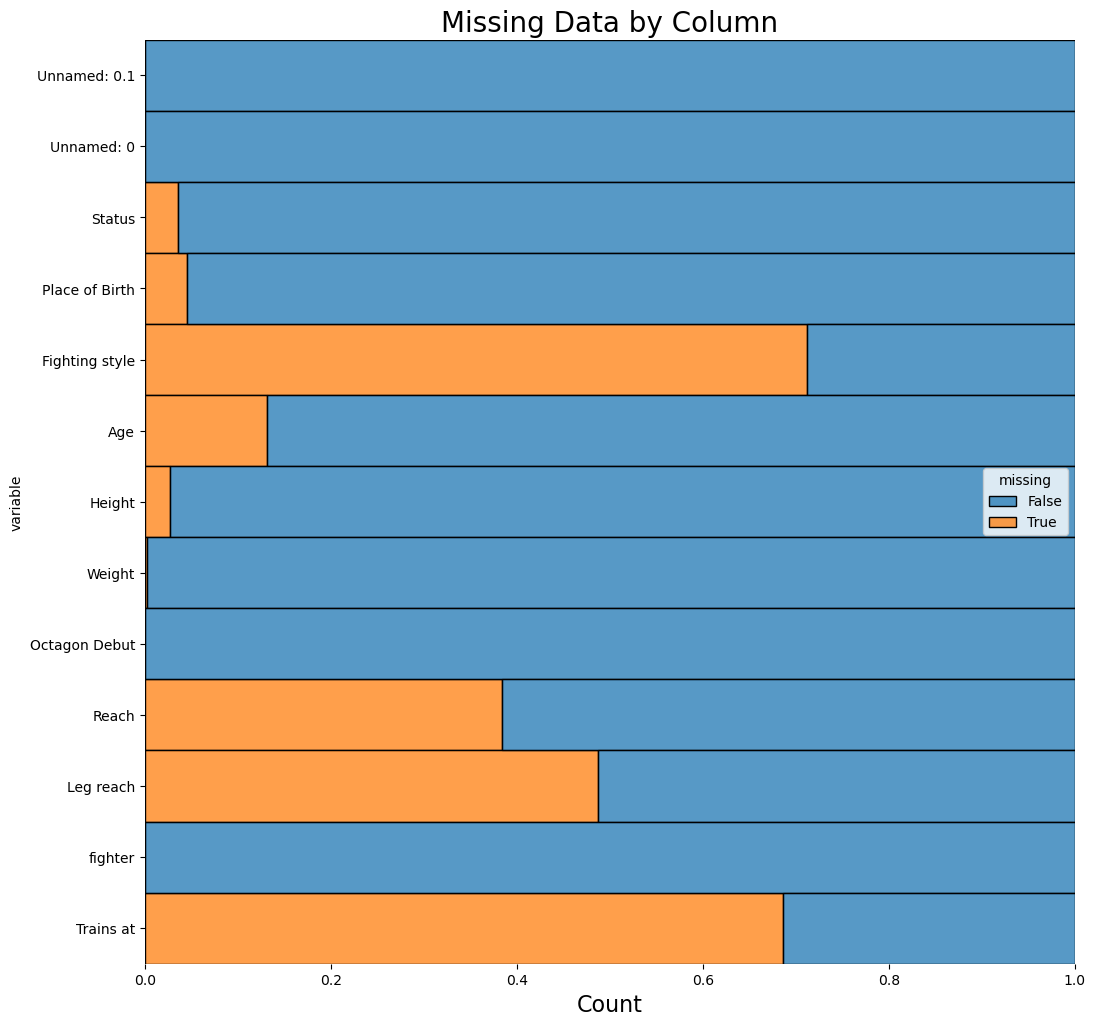

In [40]:
# Check NaNs

f, ax = plt.subplots(figsize = (12,12))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = fighter_bios.isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

ax.set_title('Missing Data by Column', fontsize = 20)
ax.set_xlabel('Count', fontsize = 16)

In [37]:
# What about only Active fighter Nans?
active = fighter_bios.loc[fighter_bios['Status'] == "Active"]
active

,Status,Place of Birth,Fighting style,Age,Height,Weight,Octagon Debut,Reach,Leg reach,fighter,Trains at
3,Active,"Houston, United States",Muay Thai,32.0,69.0,135.0,"May. 24, 2014",71.0,40.0,Aaron Phillips,Headkicks MMA
11,Active,"Rabat, Morocco",Striker,36.0,69.0,185.5,"Jul. 22, 2018",76.0,41.0,Abu Azaitar,NaN
12,Active,"Republic of Dagestan, Russia",NaN,33.0,71.0,170.5,"Nov. 09, 2019",72.0,39.5,Abubakar Nurmagomedov,NaN
13,Active,"Argun, Russia",MMA,32.0,74.0,186.0,"Sep. 03, 2022",78.0,43.0,Abus Magomedov,NaN
14,Active,"San Jose, United States",NaN,40.0,65.0,125.0,"Aug. 29, 2017",NaN,NaN,Adam Antolin,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2393,Active,"Irving, United States",Jiu-Jitsu,37.0,72.0,185.0,"Aug. 29, 2013",75.0,40.0,Zak Cummings,Glory MMA & Fitness
2396,Active,"Paris, France",MMA,38.0,68.0,147.0,"Oct. 05, 2019",72.0,42.0,Zarah Fairn,Olympia MMA
2398,Active,Kazakhstan,Freestyle,34.0,64.0,139.8,"Jul. 11, 2020",66.5,36.0,Zhalgas Zhumagulov,American Top Team
2400,Active,"Hebei, China",Muay Thai,33.0,64.0,114.8,"Aug. 04, 2018",63.0,36.0,Zhang Weili,NaN


Text(0.5, 0, 'Count')

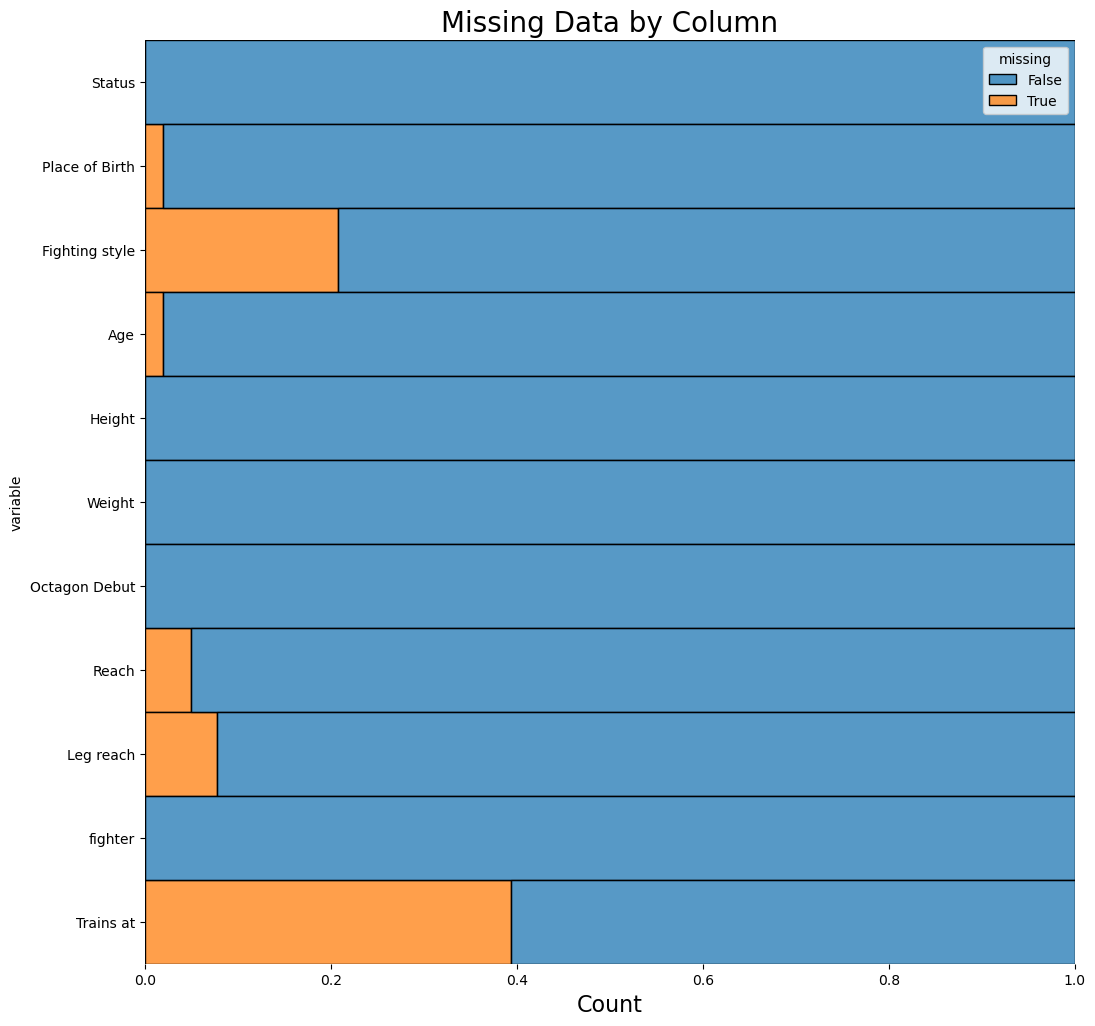

In [41]:
# Check NaNs

f, ax = plt.subplots(figsize = (12,12))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = active.isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

ax.set_title('Missing Data by Column', fontsize = 20)
ax.set_xlabel('Count', fontsize = 16)

#### Dealing with Initial Missing Values

Initial missing values are those such as Age, Status, Fighting Style (categorical variables) which I can impute unknown categories to without much issue. The others (height, weight, reach, etc) must be dealt with after the merge.

In [45]:
# if missing place of birth, replace with 'Unknown'
fighter_bios['Place of Birth'].fillna('Unknown', inplace=True)

# if missing fighting style, replace with 'Unknown'
fighter_bios['Fighting style'].fillna('Unknown', inplace=True)

# if missing Trains at, replace with 'Unknown'
fighter_bios['Trains at'].fillna('Unknown', inplace=True)

# if missing status, replace with 'Unknown'
fighter_bios['Status'].fillna('Unknown', inplace=True)

# if missing age, replace with median
fighter_bios['Age'].fillna(fighter_bios['Age'].median(), inplace=True)

# if missing height, replace with median -- thankfully not many missing, as 
# this is a somewhat important feature
fighter_bios['Height'].fillna(fighter_bios['Height'].median(), inplace=True)

# if missing weight, replace with median -- thankfully not many missing
fighter_bios['Weight'].fillna(fighter_bios['Weight'].median(), inplace=True)

In [46]:
def get_bio_data(fighter, stat):
    try:
        data = fighter_bios[fighter_bios['fighter'] == fighter]
        d = data[stat].values[0]
        d = pd.to_numeric(d)
        return d
    except:
        return nan

In [47]:
# test
weight = get_bio_data('Khabib Nurmagomedov', 'Height')
weight

70.0

In [48]:
fights['A_Height'] = fights.apply(lambda row: get_bio_data(row['Fighter_A'], 'Height'), axis=1)
fights['B_Height'] = fights.apply(lambda row: get_bio_data(row['Fighter_B'], 'Height'), axis=1)
fights['Dif_Height'] = fights['A_Height'] - fights['B_Height']

In [49]:
fights['A_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_A'], 'Reach'), axis=1)
fights['B_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_B'], 'Reach'), axis=1)
fights['Dif_Reach'] = fights['A_Reach'] - fights['B_Reach']

In [54]:
fights['A_Leg_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_A'], 'Leg reach'), axis=1)
fights['B_Leg_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_B'], 'Leg reach'), axis=1)
fights['Dif_Leg_Reach'] = fights['A_Leg_Reach'] - fights['B_Leg_Reach']

<AxesSubplot:xlabel='Count', ylabel='variable'>

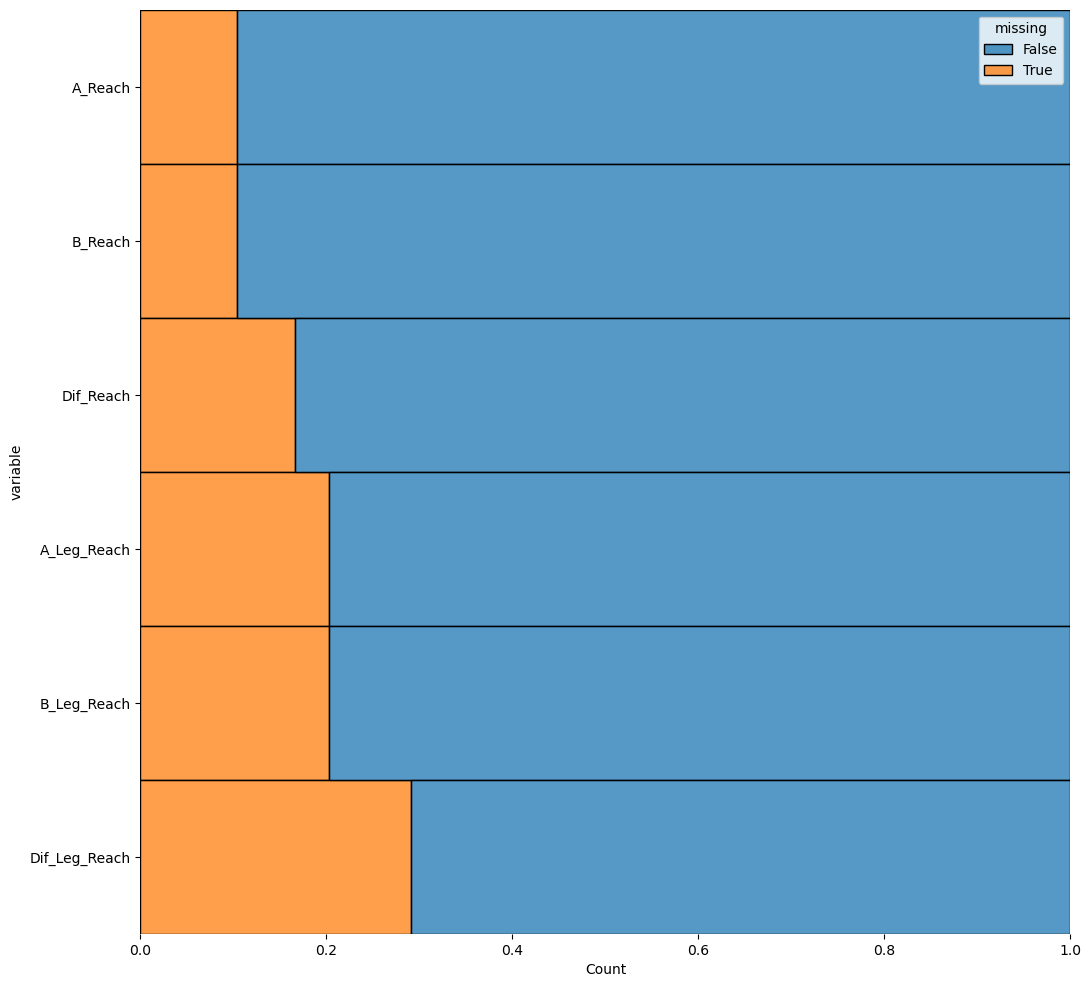

In [55]:
#Identify columns with missing values
nothere = fights.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
cols = nothere.index

f, ax = plt.subplots(figsize = (12,12))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = fights[cols].isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

In [51]:
# drop rows missing height data
fights.dropna(subset=['A_Height', 'B_Height'], inplace=True)
len(fights)

8194

In [56]:
# New column indicating if we have the reach data for fighter A
fights['A_Reach_NA'] = fights['A_Reach'].isna()

# New column indicating if we have the reach data for fighter B
fights['B_Reach_NA'] = fights['B_Reach'].isna()

# New column indicating if we have the reach data for either fighter
fights['Reach_NA'] = fights['A_Reach_NA'] | fights['B_Reach_NA']

# New column indicating if we have leg reach data for fighter A
fights['A_Leg_Reach_NA'] = fights['A_Leg_Reach'].isna()

# New column indicating if we have leg reach data for fighter B
fights['B_Leg_Reach_NA'] = fights['B_Leg_Reach'].isna()

# New column indicating if we have leg reach data for either fighter
fights['Leg_Reach_NA'] = fights['A_Leg_Reach_NA'] | fights['B_Leg_Reach_NA']

### Add Weightclass

Then you can break down height, reach, etc... by weightclass, which is in the All_Events_Fights_and_FightUrls file

In [58]:
all_events = pd.read_csv('data/final/events/All_Events_Fights_and_FightUrls.csv')

In [59]:
all_events.head()

,Unnamed: 0.1,Unnamed: 0,W/L,Weight class,Method,Round,Time,Fighter1,Fighter2,F1_Kd,F2_Kd,F1_Str,F2_Str,F1_Td,F2_Td,F1_Sub,F2_Sub,fight_num,event_id,fight_link
0,0,0,win,Heavyweight,KO/TKO Punches,3,4:23,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,1,00a905a4a4a2b071,http://www.ufcstats.com/fight-details/810c9da0...
1,1,1,win,Middleweight,U-DEC,3,5:00,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,2,00a905a4a4a2b071,http://www.ufcstats.com/fight-details/b8ca1acd...
2,2,2,win,Middleweight,U-DEC,3,5:00,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,3,00a905a4a4a2b071,http://www.ufcstats.com/fight-details/20f316f9...
3,3,3,win,Middleweight,KO/TKO Punches,3,1:09,Roman Kopylov,Alessio Di Chirico,1,0,59,39,0,0,0,0,4,00a905a4a4a2b071,http://www.ufcstats.com/fight-details/1a191251...
4,4,4,win,Featherweight,U-DEC,3,5:00,William Gomis,Jarno Errens,0,0,32,20,3,0,0,1,5,00a905a4a4a2b071,http://www.ufcstats.com/fight-details/398db400...


In [64]:
def find_typical_weightclass(fighter):
    try:
        data = all_events[all_events['Fighter1'] == fighter]
        data2 = all_events[all_events['Fighter2'] == fighter]
        data = pd.concat([data, data2])
        d = data['Weight class'].value_counts().index[0]
        return d
    except:
        return nan


In [65]:
# test
weight = find_typical_weightclass('Khabib Nurmagomedov')
weight

'Lightweight'

In [66]:
fights['A_Typical_Weightclass'] = fights.apply(lambda row: find_typical_weightclass(row['Fighter_A']), axis=1)
fights['B_Typical_Weightclass'] = fights.apply(lambda row: find_typical_weightclass(row['Fighter_B']), axis=1)

In [67]:
fights.head(3)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_Leg_Reach,Dif_Leg_Reach,A_Reach_NA,B_Reach_NA,Reach_NA,A_Leg_Reach_NA,B_Leg_Reach_NA,Leg_Reach_NA,A_Typical_Weightclass,B_Typical_Weightclass
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,38.5,-0.5,False,False,False,False,False,False,Women's Bantamweight,Women's Bantamweight
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,40.0,4.0,False,False,False,False,False,False,Heavyweight,Heavyweight
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,NaN,NaN,False,False,False,False,True,True,Heavyweight,Heavyweight
3,Alistair Overeem,Stefan Struve,0,0,17,25,2,5,0.68,0.40,...,44.0,0.5,False,False,False,False,False,False,Heavyweight,Heavyweight
4,Nordine Taleb,Kyle Prepolec,0,0,90,201,52,153,0.44,0.33,...,39.0,3.0,False,False,False,False,False,False,Welterweight,Welterweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,Marcos Rogerio,Blagoy Ivanov,0,0,68,133,62,128,0.51,0.48,...,42.0,NaN,True,False,True,True,False,True,NaN,Heavyweight
8690,Marcus Davis,Mike Swick,0,0,31,55,32,86,0.56,0.37,...,NaN,NaN,False,True,True,True,True,True,Welterweight,Welterweight
8691,Lucas Martins,Darren Elkins,0,0,26,82,47,154,0.31,0.30,...,39.0,NaN,False,False,False,True,False,True,Featherweight,Featherweight
8692,Krzysztof Jotko,Sean Strickland,0,0,37,196,84,182,0.18,0.46,...,41.5,-0.5,False,False,False,False,False,False,Middleweight,Welterweight


In [68]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V6.csv', index=False)

In [73]:
fights['fight_id']

0       0005e00b07cee542
1       0019ec81fd706ade
2       0027e179b743c86c
3       002921976d27b7da
4       003c84fc7c3fa028
              ...       
8689    ff6c8dab41efcc09
8690    ff872fa3e9ec32a9
8691    ffd3e3d37cba32da
8692    ffd8e8575a551875
8693    ffea776913451b6d
Name: fight_id, Length: 8194, dtype: object

In [78]:
# use fight_id to find weightclass of fight
def find_weightclass(fight_id):
    try:
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        d = data['Weight class'].values[0]
        return d
    except:
        return nan

In [79]:
# test
weight = find_weightclass('ff6c8dab41efcc09')
weight

'Heavyweight'

In [80]:
fights['fight_weightclass'] = fights.apply(lambda row: find_weightclass(row['fight_id']), axis=1)

In [81]:
fights.head(3)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,Dif_Leg_Reach,A_Reach_NA,B_Reach_NA,Reach_NA,A_Leg_Reach_NA,B_Leg_Reach_NA,Leg_Reach_NA,A_Typical_Weightclass,B_Typical_Weightclass,fight_weightclass
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,-0.5,False,False,False,False,False,False,Women's Bantamweight,Women's Bantamweight,Women's Bantamweight
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,4.0,False,False,False,False,False,False,Heavyweight,Heavyweight,Heavyweight
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,NaN,False,False,False,False,True,True,Heavyweight,Heavyweight,Heavyweight


In [82]:
fights['A_Fight_in_Typical_Weightclass'] = fights.apply(lambda row: row['A_Typical_Weightclass'] == row['fight_weightclass'], axis=1)
fights['B_Fight_in_Typical_Weightclass'] = fights.apply(lambda row: row['B_Typical_Weightclass'] == row['fight_weightclass'], axis=1)

In [83]:
fights.head(3)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_Reach_NA,Reach_NA,A_Leg_Reach_NA,B_Leg_Reach_NA,Leg_Reach_NA,A_Typical_Weightclass,B_Typical_Weightclass,fight_weightclass,A_Fight_in_Typical_Weightclass,B_Fight_in_Typical_Weightclass
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,False,False,False,False,False,Women's Bantamweight,Women's Bantamweight,Women's Bantamweight,True,True
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,False,False,False,False,False,Heavyweight,Heavyweight,Heavyweight,True,True
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,False,False,False,True,True,Heavyweight,Heavyweight,Heavyweight,True,True


In [84]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V7.csv', index=False)

### Feature: Method

The main methods of fight finishing are:
- Decision (DEC)
- KO/TKO
- Submission (SUB)


In [87]:
all_events.head(2)

,Unnamed: 0.1,Unnamed: 0,W/L,Weight class,Method,Round,Time,Fighter1,Fighter2,F1_Kd,F2_Kd,F1_Str,F2_Str,F1_Td,F2_Td,F1_Sub,F2_Sub,fight_num,event_id,fight_link
0,0,0,win,Heavyweight,KO/TKO Punches,3,4:23,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,1,00a905a4a4a2b071,http://www.ufcstats.com/fight-details/810c9da0...
1,1,1,win,Middleweight,U-DEC,3,5:00,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,2,00a905a4a4a2b071,http://www.ufcstats.com/fight-details/b8ca1acd...


In [86]:
all_events.Method.value_counts()[:20]

U-DEC                    2067
KO/TKO  Punches           664
KO/TKO  Punch             642
S-DEC                     582
SUB  Rear Naked Choke     419
SUB  Guillotine Choke     197
KO/TKO  Kick              145
SUB  Armbar               113
KO/TKO                     94
KO/TKO  Elbows             85
SUB  Arm Triangle          74
KO/TKO  Knee               71
M-DEC                      64
SUB  Triangle Choke        60
SUB  D'Arce Choke          31
KO/TKO  Elbow              30
SUB  Kimura                28
Overturned                 26
KO/TKO  Flying Knee        26
SUB  Anaconda Choke        23
Name: Method, dtype: int64

In [88]:
# split Method into Method and Method Detail
all_events['Method_Primary'] = all_events['Method'].str.split('  ', expand=True)[0]
all_events['Method_Detail'] = all_events['Method'].str.split('  ', expand=True)[1]
all_events.head(3)

,Unnamed: 0.1,Unnamed: 0,W/L,Weight class,Method,Round,Time,Fighter1,Fighter2,F1_Kd,...,F2_Str,F1_Td,F2_Td,F1_Sub,F2_Sub,fight_num,event_id,fight_link,Method_Primary,Method_Detail
0,0,0,win,Heavyweight,KO/TKO Punches,3,4:23,Ciryl Gane,Tai Tuivasa,1,...,29,0,0,0,0,1,00a905a4a4a2b071,http://www.ufcstats.com/fight-details/810c9da0...,KO/TKO,Punches
1,1,1,win,Middleweight,U-DEC,3,5:00,Robert Whittaker,Marvin Vettori,0,...,33,1,0,0,0,2,00a905a4a4a2b071,http://www.ufcstats.com/fight-details/b8ca1acd...,U-DEC,None
2,2,2,win,Middleweight,U-DEC,3,5:00,Nassourdine Imavov,Joaquin Buckley,0,...,46,2,0,2,0,3,00a905a4a4a2b071,http://www.ufcstats.com/fight-details/20f316f9...,U-DEC,None


In [89]:
def get_method(fight_id):
    try:
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        d = data['Method_Primary'].values[0]
        return d
    except:
        return nan

In [90]:
def get_details(fight_id):
    try:
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        d = data['Method_Detail'].values[0]
        return d
    except:
        return nan

In [92]:
# test
method = get_method('ff6c8dab41efcc09')
method

'U-DEC'

In [93]:
fights['InFightData__Method_Primary'] = fights.apply(lambda row: get_method(row['fight_id']), axis=1)
fights['InFightData__Method_Detail'] = fights.apply(lambda row: get_details(row['fight_id']), axis=1)

### Feature: Round & Time

In [94]:
def get_round_time(fight_id, round_or_time):
    try: 
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        if round_or_time == 'round':
            d = data['Round'].values[0]
        elif round_or_time == 'time':
            d = data['Time'].values[0]
        return d
    except:
        return nan

In [95]:
# test
round = get_round_time('ff6c8dab41efcc09', 'round')
round

3

In [96]:
fights['InFightData__Round'] = fights.apply(lambda row: get_round_time(row['fight_id'], 'round'), axis=1)
fights['InFightData__Time'] = fights.apply(lambda row: get_round_time(row['fight_id'], 'time'), axis=1)

In [97]:
fights.head(3)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,Leg_Reach_NA,A_Typical_Weightclass,B_Typical_Weightclass,fight_weightclass,A_Fight_in_Typical_Weightclass,B_Fight_in_Typical_Weightclass,InFightData__Method_Primary,InFightData__Method_Detail,InFightData__Round,InFightData__Time
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,False,Women's Bantamweight,Women's Bantamweight,Women's Bantamweight,True,True,U-DEC,None,5,5:00
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,False,Heavyweight,Heavyweight,Heavyweight,True,True,Overturned,None,3,5:00
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,True,Heavyweight,Heavyweight,Heavyweight,True,True,KO/TKO,Punches,3,3:12


In [98]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V8.csv', index=False)

### Dealing with Remaining Missing Values

In [101]:
# get missing values, sorted by column
missing_values = fights.isnull().sum().sort_values(ascending=False)
# get rid of 0 values
missing_values = missing_values[missing_values > 0]
# get percentage of missing values
missing_values = missing_values / len(fights) * 100
missing_values

InFightData__Method_Detail    51.598731
Dif_Leg_Reach                 29.118867
A_Leg_Reach                   20.234318
B_Leg_Reach                   20.234318
Dif_Reach                     16.597510
A_Reach                       10.361240
B_Reach                       10.361240
B_Typical_Weightclass          0.085428
A_Typical_Weightclass          0.085428
dtype: float64

In [102]:
# replace nan values in "InFightData__Method_Detail" with "None"
fights['InFightData__Method_Detail'] = fights['InFightData__Method_Detail'].fillna('None')

In [103]:
# replace nan values in Typical Weightclass with current weightclass
fights['A_Typical_Weightclass'] = fights.apply(lambda row: row['fight_weightclass'] if pd.isnull(row['A_Typical_Weightclass']) else row['A_Typical_Weightclass'], axis=1)
fights['B_Typical_Weightclass'] = fights.apply(lambda row: row['fight_weightclass'] if pd.isnull(row['B_Typical_Weightclass']) else row['B_Typical_Weightclass'], axis=1)

In [105]:
# get median reach per height
reach_by_height = fights.groupby('A_Height')['A_Reach'].median()
reach_by_height

A_Height
0.0      NaN
60.0    60.0
61.0    62.0
61.5    62.0
62.0    64.0
62.5    62.5
63.0    64.5
63.5    65.5
64.0    64.0
64.5    68.0
65.0    66.0
66.0    67.0
66.5    66.0
67.0    69.0
67.5    69.0
68.0    70.0
68.5    71.0
69.0    71.0
70.0    72.0
70.5    76.0
71.0    73.0
71.5    73.0
72.0    74.0
72.5    78.0
73.0    75.0
73.5    77.0
74.0    75.5
74.5    78.0
75.0    77.0
75.5    76.0
76.0    80.0
77.0    79.0
78.0    81.0
78.5    79.0
79.0    80.0
80.0    80.0
84.0    84.5
Name: A_Reach, dtype: float64

In [106]:
# replace nan values in reach with median reach per height
fights['A_Reach'] = fights.apply(lambda row: reach_by_height[row['A_Height']] if pd.isnull(row['A_Reach']) else row['A_Reach'], axis=1)
fights['B_Reach'] = fights.apply(lambda row: reach_by_height[row['B_Height']] if pd.isnull(row['B_Reach']) else row['B_Reach'], axis=1)

In [108]:
# get median leg reach per height
leg_reach_by_height = fights.groupby('A_Height')['A_Leg_Reach'].median()
leg_reach_by_height

A_Height
0.0       NaN
60.0    34.00
61.0    35.00
61.5    35.00
62.0    36.00
62.5    38.00
63.0    36.00
63.5    38.00
64.0    37.00
64.5    38.00
65.0    37.50
66.0    38.00
66.5    38.00
67.0    38.00
67.5    37.25
68.0    39.00
68.5    38.50
69.0    39.50
70.0    40.00
70.5    42.00
71.0    40.50
71.5    43.00
72.0    41.00
72.5    40.00
73.0    41.50
73.5    41.00
74.0    42.00
74.5    44.00
75.0    43.50
75.5    43.00
76.0    44.50
77.0    46.00
78.0    44.50
78.5    45.50
79.0    47.50
80.0      NaN
84.0    44.00
Name: A_Leg_Reach, dtype: float64

In [109]:
# replace nan values in leg reach with median leg reach per height
fights['A_Leg_Reach'] = fights.apply(lambda row: leg_reach_by_height[row['A_Height']] if pd.isnull(row['A_Leg_Reach']) else row['A_Leg_Reach'], axis=1)
fights['B_Leg_Reach'] = fights.apply(lambda row: leg_reach_by_height[row['B_Height']] if pd.isnull(row['B_Leg_Reach']) else row['B_Leg_Reach'], axis=1)

In [110]:
# recalculate leg reach dif and reach dif
fights['A_Leg_Reach_Dif'] = fights['A_Leg_Reach'] - fights['B_Leg_Reach']
fights['A_Reach_Dif'] = fights['A_Reach'] - fights['B_Reach']

In [114]:
fights.dtypes[-40:]

Dif_Rolling_Body_Strikes_att_std            float64
Dif_Rolling_Body_Strikes_percent_std        float64
Dif_Rolling_Leg_Strikes_land_std            float64
Dif_Rolling_Leg_Strikes_att_std             float64
Dif_Rolling_Leg_Strikes_percent_std         float64
Dif_Rolling_Distance_Strikes_land_std       float64
Dif_Rolling_Distance_Strikes_att_std        float64
Dif_Rolling_Distance_Strikes_percent_std    float64
Dif_Rolling_Clinch_Strikes_land_std         float64
Dif_Rolling_Clinch_Strikes_att_std          float64
Dif_Rolling_Clinch_Strikes_percent_std      float64
Dif_Rolling_Ground_Strikes_land_std         float64
Dif_Rolling_Ground_Strikes_att_std          float64
Dif_Rolling_Ground_Strikes_percent_std      float64
A_Height                                    float64
B_Height                                    float64
Dif_Height                                  float64
A_Reach                                     float64
B_Reach                                     float64
Dif_Reach   

In [115]:
# get missing values, sorted by column
missing_values = fights.isnull().sum().sort_values(ascending=False)
# get rid of 0 values
missing_values = missing_values[missing_values > 0]
# get percentage of missing values
missing_values = missing_values / len(fights) * 100
missing_values

Dif_Leg_Reach      29.118867
Dif_Reach          16.597510
A_Leg_Reach_Dif     0.683427
A_Reach_Dif         0.610203
A_Leg_Reach         0.353918
B_Leg_Reach         0.353918
A_Reach             0.317305
B_Reach             0.317305
dtype: float64

In [116]:
# get median reach per weightclass
reach_by_weightclass = fights.groupby('fight_weightclass')['A_Reach'].median()
reach_by_weightclass

fight_weightclass
Bantamweight             69.0
Catch Weight             71.0
Featherweight            71.0
Flyweight                66.0
Heavyweight              78.0
Light Heavyweight        76.0
Lightweight              71.0
Middleweight             75.0
Welterweight             74.0
Women's Bantamweight     67.5
Women's Featherweight    68.5
Women's Flyweight        66.5
Women's Strawweight      64.0
Name: A_Reach, dtype: float64

In [117]:
# get median height per weightclass
height_by_weightclass = fights.groupby('fight_weightclass')['A_Height'].median()
height_by_weightclass

fight_weightclass
Bantamweight             67.0
Catch Weight             70.0
Featherweight            69.0
Flyweight                65.0
Heavyweight              75.0
Light Heavyweight        74.0
Lightweight              70.0
Middleweight             73.0
Welterweight             71.0
Women's Bantamweight     66.0
Women's Featherweight    67.0
Women's Flyweight        66.0
Women's Strawweight      64.0
Name: A_Height, dtype: float64

In [118]:
# replace nan values in "A_Reach" with median for weight class
fights['A_Reach'] = fights.apply(lambda row: reach_by_weightclass[row['fight_weightclass']] if pd.isnull(row['A_Reach']) else row['A_Reach'], axis=1)
fights['B_Reach'] = fights.apply(lambda row: reach_by_weightclass[row['fight_weightclass']] if pd.isnull(row['B_Reach']) else row['B_Reach'], axis=1)

# replace nan values in "A_Height" with median for weight class
fights['A_Height'] = fights.apply(lambda row: height_by_weightclass[row['fight_weightclass']] if pd.isnull(row['A_Height']) else row['A_Height'], axis=1)
fights['B_Height'] = fights.apply(lambda row: height_by_weightclass[row['fight_weightclass']] if pd.isnull(row['B_Height']) else row['B_Height'], axis=1)


In [121]:
# Once again, re-run the Difs
fights['Dif_Leg_Reach'] = fights['A_Leg_Reach'] - fights['B_Leg_Reach']
fights['Dif_Reach'] = fights['A_Reach'] - fights['B_Reach']

In [122]:
# get missing
missing_values = fights.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / len(fights) * 100
missing_values

Dif_Leg_Reach      0.683427
Leg_Reach_Dif      0.683427
A_Leg_Reach_Dif    0.683427
A_Reach_Dif        0.610203
B_Leg_Reach        0.353918
A_Leg_Reach        0.353918
dtype: float64

In [123]:
# drop nan values
fights = fights.dropna()


In [124]:
# drop A_Reach_Dif and A_Leg_Reach_Dif
fights = fights.drop(['A_Reach_Dif', 'A_Leg_Reach_Dif'], axis=1)

### Feature: Size Ratios

In [125]:
fights['A_Ape_Index'] = fights['A_Reach'] / fights['A_Height']
fights['B_Ape_Index'] = fights['B_Reach'] / fights['B_Height']

# Leg_Index = Leg_Reach / Height
fights['A_Leg_Index'] = fights['A_Leg_Reach'] / fights['A_Height']
fights['B_Leg_Index'] = fights['B_Leg_Reach'] / fights['B_Height']

# Leg_to_Wing_Index = Leg_Reach / Reach
fights['A_Leg_to_Wing_Index'] = fights['A_Leg_Reach'] / fights['A_Reach']
fights['B_Leg_to_Wing_Index'] = fights['B_Leg_Reach'] / fights['B_Reach']

In [126]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V9.csv', index=False)

### Feature: Winner

In [128]:
# split Winner columns by " 
fights['Winner'] = fights['Winner'].str.split('"').str[0].str.strip()
fights.head(2)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,InFightData__Round,InFightData__Time,Leg_Reach_Dif,Reach_Dif,A_Ape_Index,B_Ape_Index,A_Leg_Index,B_Leg_Index,A_Leg_to_Wing_Index,B_Leg_to_Wing_Index
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,5,5:00,-0.5,0.5,1.014706,0.992754,0.558824,0.557971,0.550725,0.562044
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,3,5:00,4.0,7.5,1.038961,1.006944,0.571429,0.555556,0.550000,0.551724


In [130]:
# add column "win?", if column winner is equal to fighter_A
fights['win?'] = fights.apply(lambda row: 1 if row['Winner'] == row['Fighter_A'] else 0, axis=1)
fights.head(30)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,InFightData__Time,Leg_Reach_Dif,Reach_Dif,A_Ape_Index,B_Ape_Index,A_Leg_Index,B_Leg_Index,A_Leg_to_Wing_Index,B_Leg_to_Wing_Index,win?
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,5:00,-0.5,0.5,1.014706,0.992754,0.558824,0.557971,0.550725,0.562044,1
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,5:00,4.0,7.5,1.038961,1.006944,0.571429,0.555556,0.550000,0.551724,0
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,3:12,-0.5,0.0,1.013514,1.027397,0.554054,0.568493,0.546667,0.553333,1
3,Alistair Overeem,Stefan Struve,0,0,17,25,2,5,0.68,0.40,...,4:13,0.5,-4.5,1.052632,1.005952,0.585526,0.523810,0.556250,0.520710,1
4,Nordine Taleb,Kyle Prepolec,0,0,90,201,52,153,0.44,0.33,...,5:00,3.0,4.5,1.020548,1.000000,0.575342,0.557143,0.563758,0.557143,1
5,Matt Brown,Jordan Mein,0,1,40,84,24,58,0.47,0.41,...,1:00,2.0,2.0,1.041667,1.013889,0.597222,0.569444,0.573333,0.561644,1
6,Beneil Dariush,Rashid Magomedov,0,0,60,120,41,78,0.50,0.52,...,5:00,1.0,1.5,1.028571,1.021739,0.578571,0.572464,0.562500,0.560284,1
7,Andy Ogle,Cole Miller,0,0,27,51,21,40,0.52,0.52,...,5:00,-2.0,-5.0,1.014706,1.013699,0.573529,0.561644,0.565217,0.554054,0
8,Urijah Faber,Michael McDonald,1,0,29,46,9,27,0.63,0.33,...,3:22,-2.0,-3.0,1.015152,1.014493,0.560606,0.565217,0.552239,0.557143,1
10,Li Jingliang,Dhiego Lima,1,0,13,39,6,16,0.33,0.37,...,1:25,-2.0,-3.5,0.993056,1.013514,0.562500,0.574324,0.566434,0.566667,1


In [131]:
# check number of wins vs losses
fights['win?'].value_counts()

1    4069
0    4069
Name: win?, dtype: int64

In [132]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V10.csv', index=False)

### Feature: Favorite

In [134]:
# get columns in fight df with odds in the name
odds_columns = [col for col in fights.columns if 'Odds' in col]
odds_columns

['Fighter_A_Odds',
 'Fighter_B_Odds',
 'Fighter_A_Odds_Change',
 'Fighter_B_Odds_Change',
 'Dif_Odds']

In [138]:
fights['favorite?'] = np.where(fights['Fighter_A_Odds'] < fights['Fighter_B_Odds'], 1, 0)
fights['favorite?'].value_counts()

0    4139
1    3999
Name: favorite?, dtype: int64

In [139]:
fight_check_cols = ['Fighter_A', 'Fighter_B', 'Winner', 'win?', 'Fighter_A_Odds', 'Fighter_B_Odds','favorite?']
fights[fight_check_cols].head(30)

,Fighter_A,Fighter_B,Winner,win?,Fighter_A_Odds,Fighter_B_Odds,favorite?
0,Holly Holm,Irene Aldana,Holly Holm,1,-125.0,105.0,1
1,Greg Hardy,Ben Sosoli,Ben Sosoli,0,-400.0,325.0,1
2,Jared Rosholt,Josh Copeland,Jared Rosholt,1,-310.0,280.0,1
3,Alistair Overeem,Stefan Struve,Alistair Overeem,1,-200.0,185.0,1
4,Nordine Taleb,Kyle Prepolec,Nordine Taleb,1,-420.0,335.0,1
5,Matt Brown,Jordan Mein,Matt Brown,1,290.0,-320.0,0
6,Beneil Dariush,Rashid Magomedov,Beneil Dariush,1,-115.0,-105.0,1
7,Andy Ogle,Cole Miller,Cole Miller,0,185.0,-200.0,0
8,Urijah Faber,Michael McDonald,Urijah Faber,1,-150.0,130.0,1
10,Li Jingliang,Dhiego Lima,Li Jingliang,1,130.0,-140.0,0


In [ ]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V11.csv', index=False)

In [4]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V11.csv')

In [5]:
fights.head()

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,Leg_Reach_Dif,Reach_Dif,A_Ape_Index,B_Ape_Index,A_Leg_Index,B_Leg_Index,A_Leg_to_Wing_Index,B_Leg_to_Wing_Index,win?,favorite?
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,-0.5,0.5,1.014706,0.992754,0.558824,0.557971,0.550725,0.562044,1,1
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,4.0,7.5,1.038961,1.006944,0.571429,0.555556,0.550000,0.551724,0,1
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,-0.5,0.0,1.013514,1.027397,0.554054,0.568493,0.546667,0.553333,1,1
3,Alistair Overeem,Stefan Struve,0,0,17,25,2,5,0.68,0.40,...,0.5,-4.5,1.052632,1.005952,0.585526,0.523810,0.556250,0.520710,1,1
4,Nordine Taleb,Kyle Prepolec,0,0,90,201,52,153,0.44,0.33,...,3.0,4.5,1.020548,1.000000,0.575342,0.557143,0.563758,0.557143,1,1


### Features: Win/Loss Details

In [24]:
# get columns with date in the name
date_columns = [col for col in fights.columns if 'date' in col]
date_columns

['date']

In [26]:
# add a formatted date column
fights['datetime'] = pd.to_datetime(fights['date'])
fights['date_formatted'] = fights['datetime'].dt.date

In [27]:
fights

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,A_Ape_Index,B_Ape_Index,A_Leg_Index,B_Leg_Index,A_Leg_to_Wing_Index,B_Leg_to_Wing_Index,win?,favorite?,datetime,date_formatted
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,1.014706,0.992754,0.558824,0.557971,0.550725,0.562044,1,1,2020-10-03,2020-10-03
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,1.038961,1.006944,0.571429,0.555556,0.550000,0.551724,0,1,2019-10-18,2019-10-18
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,1.013514,1.027397,0.554054,0.568493,0.546667,0.553333,1,1,2015-03-14,2015-03-14
3,Alistair Overeem,Stefan Struve,0,0,17,25,2,5,0.68,0.40,...,1.052632,1.005952,0.585526,0.523810,0.556250,0.520710,1,1,2014-12-13,2014-12-13
4,Nordine Taleb,Kyle Prepolec,0,0,90,201,52,153,0.44,0.33,...,1.020548,1.000000,0.575342,0.557143,0.563758,0.557143,1,1,2019-05-04,2019-05-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8133,Charles Oliveira,Nik Lentz,1,0,64,84,37,69,0.76,0.53,...,1.057143,1.000000,0.585714,0.573529,0.554054,0.573529,1,1,2015-05-30,2015-05-30
8134,Marcus Davis,Mike Swick,0,0,31,55,32,86,0.56,0.37,...,1.000000,1.027397,0.571429,0.568493,0.571429,0.553333,0,0,2008-06-07,2008-06-07
8135,Lucas Martins,Darren Elkins,0,0,26,82,47,154,0.31,0.30,...,1.000000,1.014286,0.569444,0.557143,0.569444,0.549296,0,0,2014-10-25,2014-10-25
8136,Krzysztof Jotko,Sean Strickland,0,0,37,196,84,182,0.18,0.46,...,1.054795,1.041096,0.561644,0.568493,0.532468,0.546053,0,0,2021-05-01,2021-05-01


In [31]:
def get_number_UFC_fights(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return len(data)


In [32]:
get_number_UFC_fights('Conor McGregor', '2020-01-01')

10

In [33]:
fights['A_Total_UFC_Fights'] = fights.apply(lambda row: get_number_UFC_fights(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Total_UFC_Fights'] = fights.apply(lambda row: get_number_UFC_fights(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Total_UFC_Fights'] = fights['A_Total_UFC_Fights'] - fights['B_Total_UFC_Fights']

In [35]:
fights.head(3)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_Leg_Index,A_Leg_to_Wing_Index,B_Leg_to_Wing_Index,win?,favorite?,datetime,date_formatted,A_Total_UFC_Fights,B_Total_UFC_Fights,Dif_Total_UFC_Fights
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,0.557971,0.550725,0.562044,1,1,2020-10-03,2020-10-03,9,7,2
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,0.555556,0.550000,0.551724,0,1,2019-10-18,2019-10-18,3,0,3
2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,0.25,...,0.568493,0.546667,0.553333,1,1,2015-03-14,2015-03-14,2,1,1


#### Wins

In [36]:
# add number of wins
def get_number_UFC_wins(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return data['win?'].sum()

In [37]:
fights['A_UFC_Wins'] = fights.apply(lambda row: get_number_UFC_wins(row['Fighter_A'], row['datetime']), axis=1)
fights['B_UFC_Wins'] = fights.apply(lambda row: get_number_UFC_wins(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_UFC_Wins'] = fights['A_UFC_Wins'] - fights['B_UFC_Wins']

#### Losses

In [38]:
def get_number_UFC_losses(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return len(data) - data['win?'].sum()

In [39]:
fights['A_UFC_Losses'] = fights.apply(lambda row: get_number_UFC_losses(row['Fighter_A'], row['datetime']), axis=1)
fights['B_UFC_Losses'] = fights.apply(lambda row: get_number_UFC_losses(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_UFC_Losses'] = fights['A_UFC_Losses'] - fights['B_UFC_Losses']

#### W/L Percentages

In [40]:
fights['A_UFC_Win_Percentage'] = fights['A_UFC_Wins'] / fights['A_Total_UFC_Fights']
fights['B_UFC_Win_Percentage'] = fights['B_UFC_Wins'] / fights['B_Total_UFC_Fights']

# add diff
fights['Dif_UFC_Win_Percentage'] = fights['A_UFC_Win_Percentage'] - fights['B_UFC_Win_Percentage']

### Last 5

#### Last 5 Win Percentage

In [43]:
def get_last5_win_percentage(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    data = data.sort_values(by='datetime', ascending=False)
    data = data.head(5)
    return data['win?'].sum() / len(data)

In [44]:
fights['A_Last5_Win_Percentage'] = fights.apply(lambda row: get_last5_win_percentage(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Last5_Win_Percentage'] = fights.apply(lambda row: get_last5_win_percentage(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Last5_Win_Percentage'] = fights['A_Last5_Win_Percentage'] - fights['B_Last5_Win_Percentage']

#### Last 3 Win Percentage

In [45]:
def get_last3_win_percentage(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    data = data.sort_values(by='datetime', ascending=False)
    data = data.head(3)
    return data['win?'].sum() / len(data)

In [46]:
fights['A_Last3_Win_Percentage'] = fights.apply(lambda row: get_last3_win_percentage(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Last3_Win_Percentage'] = fights.apply(lambda row: get_last3_win_percentage(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Last3_Win_Percentage'] = fights['A_Last3_Win_Percentage'] - fights['B_Last3_Win_Percentage']

### Win_by / Loss_by Features

In [53]:

fights['InFightData__Method_Primary'].value_counts()

U-DEC         3018
KO/TKO        2584
SUB           1472
S-DEC          872
M-DEC           78
Overturned      64
CNC             30
DQ              18
Other            2
Name: InFightData__Method_Primary, dtype: int64

In [54]:
def get_general_method(fight_method):
    if 'DEC' in fight_method:
        return 'DEC'
    elif 'SUB' in fight_method:
        return 'SUB'
    elif 'KO' in fight_method:
        return 'KO'
    else:
        return 'OTHER'

In [55]:
# make general method column
fights['InFightData__General_Method'] = fights['InFightData__Method_Primary'].apply(lambda x: get_general_method(x))

In [56]:
fights.head(2)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,A_UFC_Win_Percentage,B_UFC_Win_Percentage,Dif_UFC_Win_Percentage,A_Last5_Win_Percentage,B_Last5_Win_Percentage,Dif_Last5_Win_Percentage,A_Last3_Win_Percentage,B_Last3_Win_Percentage,Dif_Last3_Win_Percentage,InFightData__General_Method
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,0.666667,0.571429,0.095238,0.600000,0.8,-0.2,0.666667,0.666667,0.0,DEC
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,0.666667,NaN,NaN,0.666667,NaN,NaN,0.666667,NaN,NaN,OTHER


In [57]:
def get_win_by_ko_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    wins = data[data['win?'] == 1]
    wins = wins[wins['InFightData__General_Method'] == 'KO']
    return data['win?'].sum() / len(data)

def get_loss_by_ko_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    losses = data[data['win?'] == 0]
    losses = losses[losses['InFightData__General_Method'] == 'KO']
    return data['win?'].sum() / len(data)

In [58]:
fights['A_Win_By_KO_Percentage'] = fights.apply(lambda row: get_win_by_ko_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Win_By_KO_Percentage'] = fights.apply(lambda row: get_win_by_ko_percent(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Win_By_KO_Percentage'] = fights['A_Win_By_KO_Percentage'] - fights['B_Win_By_KO_Percentage']

In [59]:
fights['A_Loss_By_KO_Percentage'] = fights.apply(lambda row: get_loss_by_ko_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Loss_By_KO_Percentage'] = fights.apply(lambda row: get_loss_by_ko_percent(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Loss_By_KO_Percentage'] = fights['A_Loss_By_KO_Percentage'] - fights['B_Loss_By_KO_Percentage']

#### Win/Loss by DEC

In [60]:
def get_win_by_decision_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    wins = data[data['win?'] == 1]
    wins = wins[wins['InFightData__General_Method'] == 'DEC']
    return data['win?'].sum() / len(data)

def get_loss_by_decision_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    losses = data[data['win?'] == 0]
    losses = losses[losses['InFightData__General_Method'] == 'DEC']
    return data['win?'].sum() / len(data)

In [61]:
fights['A_Win_By_Decision_Percentage'] = fights.apply(lambda row: get_win_by_decision_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Win_By_Decision_Percentage'] = fights.apply(lambda row: get_win_by_decision_percent(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Win_By_Decision_Percentage'] = fights['A_Win_By_Decision_Percentage'] - fights['B_Win_By_Decision_Percentage']

In [62]:
fights['A_Loss_By_Decision_Percentage'] = fights.apply(lambda row: get_loss_by_decision_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Loss_By_Decision_Percentage'] = fights.apply(lambda row: get_loss_by_decision_percent(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Loss_By_Decision_Percentage'] = fights['A_Loss_By_Decision_Percentage'] - fights['B_Loss_By_Decision_Percentage']

In [63]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V12.csv', index=False)

### Round & Time Statistics

In [64]:
# find round columns
round_cols = [col for col in fights.columns if 'Round' in col]
round_cols

['InFightData__Round']

In [65]:
time_cols = [col for col in fights.columns if 'Time' in col]
time_cols

['InFightData__Time']

In [68]:
fights.InFightData__Round.dtypes

dtype('int64')

In [70]:
fights.InFightData__Time

0       5:00
1       5:00
2       3:12
3       4:13
4       5:00
        ... 
8133    1:10
8134    5:00
8135    5:00
8136    5:00
8137    2:37
Name: InFightData__Time, Length: 8138, dtype: object

In [71]:
# convert time to seconds
fights['final_round_seconds'] = fights.InFightData__Time.apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

In [72]:
fights['InFightData__Total_Fight_Time_Seconds'] = (fights['InFightData__Round'] - 1) * 5 * 60 + fights['final_round_seconds']

#### Career Fight Time

In [73]:
def get_career_fight_time_seconds(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return data['InFightData__Total_Fight_Time_Seconds'].sum()

In [74]:
fights['A_UFC_Fight_Time_Seconds'] = fights.apply(lambda row: get_career_fight_time_seconds(row['Fighter_A'], row['datetime']), axis=1)
fights['B_UFC_Fight_Time_Seconds'] = fights.apply(lambda row: get_career_fight_time_seconds(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_UFC_Fight_Time_Seconds'] = fights['A_UFC_Fight_Time_Seconds'] - fights['B_UFC_Fight_Time_Seconds']

### Fix NANs

In [77]:
missing = fights.isna().sum()
missing[missing > 0]
missing = missing[missing > 0]
missing

A_UFC_Win_Percentage               1613
B_UFC_Win_Percentage               1613
Dif_UFC_Win_Percentage             2624
A_Last5_Win_Percentage             1613
B_Last5_Win_Percentage             1613
Dif_Last5_Win_Percentage           2624
A_Last3_Win_Percentage             1613
B_Last3_Win_Percentage             1613
Dif_Last3_Win_Percentage           2624
A_Win_By_KO_Percentage             1613
B_Win_By_KO_Percentage             1613
Dif_Win_By_KO_Percentage           2624
A_Loss_By_KO_Percentage            1613
B_Loss_By_KO_Percentage            1613
Dif_Loss_By_KO_Percentage          2624
A_Win_By_Decision_Percentage       1613
B_Win_By_Decision_Percentage       1613
Dif_Win_By_Decision_Percentage     2624
A_Loss_By_Decision_Percentage      1613
B_Loss_By_Decision_Percentage      1613
Dif_Loss_By_Decision_Percentage    2624
dtype: int64

In [78]:
# fill nans with 0
fights = fights.fillna(0)

In [76]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V13.csv', index=False)

### Stats / Round Features

For these, use 1) Top down, and 2) Opponent averages

In [13]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V13.csv')

In [14]:
fights.columns.to_list()

['Fighter_A',
 'Fighter_B',
 'A_Kd',
 'B_Kd',
 'A_Sig_strike_land',
 'A_Sig_strike_att',
 'B_Sig_strike_land',
 'B_Sig_strike_att',
 'A_Sig_strike_percent',
 'B_Sig_strike_percent',
 'A_Total_Strikes_land',
 'A_Total_Strikes_att',
 'B_Total_Strikes_land',
 'B_Total_Strikes_att',
 'A_Total_Strikes_percent',
 'B_Total_Strikes_percent',
 'A_Takedowns_land',
 'A_Takedowns_att',
 'B_Takedowns_land',
 'B_Takedowns_att',
 'A_Takedown_percent',
 'B_Takedown_percent',
 'A_Sub_Attempts_land',
 'A_Sub_Attempts_att',
 'B_Sub_Attempts_land',
 'B_Sub_Attempts_att',
 'A_Rev',
 'B_Rev',
 'A_Ctrl_time_min',
 'A_Ctrl_time_sec',
 'B_Ctrl_time_min',
 'B_Ctrl_time_sec',
 'A_Ctrl_time_tot',
 'B_Ctrl_time_tot',
 'details',
 'event_title',
 'event_url',
 'date',
 'Winner',
 'fight_id',
 'Unnamed: 0',
 'A_Head_Strikes_land',
 'A_Head_Strikes_att',
 'B_Head_Strikes_land',
 'B_Head_Strikes_att',
 'A_Head_Strikes_percent',
 'B_Head_Strikes_percent',
 'A_Body_Strikes_land',
 'A_Body_Strikes_att',
 'B_Body_Strikes_

In [15]:
topdown_cols = [n for n in fights.columns.to_list() if 'topdown' in n]
# A TOPDOWN
a_topdown_cols = [n for n in topdown_cols if n.startswith('A_')]
# get rid of any percent columns
a_topdown_cols = [n for n in a_topdown_cols if 'percent' not in n]

# B TOPDOWN
b_topdown_cols = [n for n in topdown_cols if n.startswith('B_')]
# get rid of any percent columns
b_topdown_cols = [n for n in b_topdown_cols if 'percent' not in n]


In [16]:
fights.head(2)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_Win_By_Decision_Percentage,Dif_Win_By_Decision_Percentage,A_Loss_By_Decision_Percentage,B_Loss_By_Decision_Percentage,Dif_Loss_By_Decision_Percentage,final_round_seconds,InFightData__Total_Fight_Time_Seconds,A_UFC_Fight_Time_Seconds,B_UFC_Fight_Time_Seconds,Dif_UFC_Fight_Time_Seconds
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,0.571429,0.095238,0.666667,0.571429,0.095238,300,1500,7788,5595,2193
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,0.000000,0.000000,0.666667,0.000000,0.000000,300,900,628,0,628


In [17]:
# use A_UFC_Fight_Time_Seconds to deduce total number of rounds
# 5 minutes per round
# get total number of rounds in ufc
fights['A_UFC_Fight_Rounds'] = fights['A_UFC_Fight_Time_Seconds'] / 300
fights['B_UFC_Fight_Rounds'] = fights['B_UFC_Fight_Time_Seconds'] / 300

In [18]:
# add per-round averages using topdown columns
for col in a_topdown_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['A_UFC_Fight_Rounds']

for col in b_topdown_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['B_UFC_Fight_Rounds']

In [19]:
fights.head(2)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_topdown_Avg_Body_Strikes_land_per_round,B_topdown_Avg_Body_Strikes_att_per_round,B_topdown_Avg_Leg_Strikes_land_per_round,B_topdown_Avg_Leg_Strikes_att_per_round,B_topdown_Avg_Distance_Strikes_land_per_round,B_topdown_Avg_Distance_Strikes_att_per_round,B_topdown_Avg_Clinch_Strikes_land_per_round,B_topdown_Avg_Clinch_Strikes_att_per_round,B_topdown_Avg_Ground_Strikes_land_per_round,B_topdown_Avg_Ground_Strikes_att_per_round
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,0.565982,1.006851,0.679178,0.911528,3.395889,9.627644,0.23235,0.327674,0.268097,0.387251
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,inf,inf,inf,inf,inf,inf,NaN,inf,NaN,NaN


In [21]:
fights.columns.to_list()

['Fighter_A',
 'Fighter_B',
 'A_Kd',
 'B_Kd',
 'A_Sig_strike_land',
 'A_Sig_strike_att',
 'B_Sig_strike_land',
 'B_Sig_strike_att',
 'A_Sig_strike_percent',
 'B_Sig_strike_percent',
 'A_Total_Strikes_land',
 'A_Total_Strikes_att',
 'B_Total_Strikes_land',
 'B_Total_Strikes_att',
 'A_Total_Strikes_percent',
 'B_Total_Strikes_percent',
 'A_Takedowns_land',
 'A_Takedowns_att',
 'B_Takedowns_land',
 'B_Takedowns_att',
 'A_Takedown_percent',
 'B_Takedown_percent',
 'A_Sub_Attempts_land',
 'A_Sub_Attempts_att',
 'B_Sub_Attempts_land',
 'B_Sub_Attempts_att',
 'A_Rev',
 'B_Rev',
 'A_Ctrl_time_min',
 'A_Ctrl_time_sec',
 'B_Ctrl_time_min',
 'B_Ctrl_time_sec',
 'A_Ctrl_time_tot',
 'B_Ctrl_time_tot',
 'details',
 'event_title',
 'event_url',
 'date',
 'Winner',
 'fight_id',
 'Unnamed: 0',
 'A_Head_Strikes_land',
 'A_Head_Strikes_att',
 'B_Head_Strikes_land',
 'B_Head_Strikes_att',
 'A_Head_Strikes_percent',
 'B_Head_Strikes_percent',
 'A_Body_Strikes_land',
 'A_Body_Strikes_att',
 'B_Body_Strikes_

In [22]:
# get opponent average columns
opp_avg_cols = [n for n in fights.columns.to_list() if 'Opp_Avg' in n]
# A OPP AVG
a_opp_avg_cols = [n for n in opp_avg_cols if n.startswith('A_')]
# get rid of any percent columns
a_opp_avg_cols = [n for n in a_opp_avg_cols if 'percent' not in n]

# B OPP AVG
b_opp_avg_cols = [n for n in opp_avg_cols if n.startswith('B_')]
# get rid of any percent columns
b_opp_avg_cols = [n for n in b_opp_avg_cols if 'percent' not in n]

b_opp_avg_cols

['B_Opp_Avg_Kd',
 'B_Opp_Avg_Sig_strike_land',
 'B_Opp_Avg_Sig_strike_att',
 'B_Opp_Avg_Total_Strikes_land',
 'B_Opp_Avg_Total_Strikes_att',
 'B_Opp_Avg_Takedowns_land',
 'B_Opp_Avg_Takedowns_att',
 'B_Opp_Avg_Sub_Attempts_land',
 'B_Opp_Avg_Sub_Attempts_att',
 'B_Opp_Avg_Rev',
 'B_Opp_Avg_Ctrl_time_min',
 'B_Opp_Avg_Ctrl_time_sec',
 'B_Opp_Avg_Ctrl_time_tot',
 'B_Opp_Avg_Head_Strikes_land',
 'B_Opp_Avg_Head_Strikes_att',
 'B_Opp_Avg_Body_Strikes_land',
 'B_Opp_Avg_Body_Strikes_att',
 'B_Opp_Avg_Leg_Strikes_land',
 'B_Opp_Avg_Leg_Strikes_att',
 'B_Opp_Avg_Distance_Strikes_land',
 'B_Opp_Avg_Distance_Strikes_att',
 'B_Opp_Avg_Clinch_Strikes_land',
 'B_Opp_Avg_Clinch_Strikes_att',
 'B_Opp_Avg_Ground_Strikes_land',
 'B_Opp_Avg_Ground_Strikes_att']

In [23]:
# add per-round averages using opponent averages
for col in a_opp_avg_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['A_UFC_Fight_Rounds']

for col in b_opp_avg_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['B_UFC_Fight_Rounds']


#### Add Per-Round Difs

In [29]:
# add difference in per-round averages

# get per-round topdown columns
topdown_per_round_cols = [n for n in fights.columns.to_list() if 'topdown' and 'per_round' in n]

topdown_per_round_cols = pd.DataFrame(topdown_per_round_cols)
topdown_per_round_cols.columns = ['col']
topdown_per_round_cols['non-specific'] = topdown_per_round_cols['col'].str[2:]
# get unique values
topdown_per_round_cols = topdown_per_round_cols['non-specific'].unique().tolist()

In [30]:
topdown_per_round_cols

['topdown_Avg_Kd_per_round',
 'topdown_Avg_Sig_strike_land_per_round',
 'topdown_Avg_Sig_strike_att_per_round',
 'topdown_Avg_Total_Strikes_land_per_round',
 'topdown_Avg_Total_Strikes_att_per_round',
 'topdown_Avg_Takedowns_land_per_round',
 'topdown_Avg_Takedowns_att_per_round',
 'topdown_Avg_Sub_Attempts_land_per_round',
 'topdown_Avg_Sub_Attempts_att_per_round',
 'topdown_Avg_Rev_per_round',
 'topdown_Avg_Ctrl_time_min_per_round',
 'topdown_Avg_Ctrl_time_sec_per_round',
 'topdown_Avg_Ctrl_time_tot_per_round',
 'topdown_Avg_Head_Strikes_land_per_round',
 'topdown_Avg_Head_Strikes_att_per_round',
 'topdown_Avg_Body_Strikes_land_per_round',
 'topdown_Avg_Body_Strikes_att_per_round',
 'topdown_Avg_Leg_Strikes_land_per_round',
 'topdown_Avg_Leg_Strikes_att_per_round',
 'topdown_Avg_Distance_Strikes_land_per_round',
 'topdown_Avg_Distance_Strikes_att_per_round',
 'topdown_Avg_Clinch_Strikes_land_per_round',
 'topdown_Avg_Clinch_Strikes_att_per_round',
 'topdown_Avg_Ground_Strikes_land_pe

In [31]:
for col in topdown_per_round_cols:
    fights[f'Dif_{col}'] = fights[f'A_{col}'] - fights[f'B_{col}']

In [32]:
fights.head(2)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,Dif_Opp_Avg_Body_Strikes_land_per_round,Dif_Opp_Avg_Body_Strikes_att_per_round,Dif_Opp_Avg_Leg_Strikes_land_per_round,Dif_Opp_Avg_Leg_Strikes_att_per_round,Dif_Opp_Avg_Distance_Strikes_land_per_round,Dif_Opp_Avg_Distance_Strikes_att_per_round,Dif_Opp_Avg_Clinch_Strikes_land_per_round,Dif_Opp_Avg_Clinch_Strikes_att_per_round,Dif_Opp_Avg_Ground_Strikes_land_per_round,Dif_Opp_Avg_Ground_Strikes_att_per_round
0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,0.37,...,-0.438261,-0.773091,-0.375092,-0.354364,-2.452268,-6.012022,0.171166,0.113466,-0.117277,-0.271253
1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,0.26,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,NaN,NaN


In [33]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V14.csv', index=False)